In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [421]:
df = pd.read_csv('spy_data.csv')
df.Date = pd.to_datetime(df.Date)
df = df[['Date','SP500']].sort_values('Date').reset_index(drop = True)
print('Data start date:',df.Date.min().strftime("%Y-%m-%d"))
print('Data end date:',df.Date.max().strftime("%Y-%m-%d"))

Data start date: 1871-01-01
Data end date: 2018-04-01


In [422]:
# strategy 1: Invest on any day and return the n year return. 
def any_day_return(df_analysis,n_years = None,seed = None):
    np.random.seed(seed)
    roi_list = []
    for i in range(100):
        invest_day = np.random.choice(df_analysis.Date)
        share_price = df_analysis.loc[df_analysis.Date == invest_day,'SP500'].values[0]
        shares_bought = 100/share_price
        sell_day = pd.Timestamp(invest_day)+dt.timedelta(365*n_years) # Wondering why I have to convert invest_day to timestamp? Welcome to (date) hell.
        sell_day = sell_day.replace(day = 1) # monthly data. hence.
        if sell_day>pd.Timestamp(analysis_end_date):
            continue
        sell_share_price = df_analysis.loc[df_analysis.Date == sell_day,'SP500'].values[0]
        sell_invest_amount = sell_share_price * shares_bought
        roi_list.append(sell_invest_amount - 100) # % return
    return np.mean(roi_list)

# strategy 2: Invest on ATH only. 



def ath_days_f(df_analysis, n_months = 3,drop = 0.96):
    all_days = df_analysis.Date
    all_prices = df_analysis.SP500
    is_ath = []

    for k in range(n_months,len(all_days)-n_months):
        before = np.mean(all_prices[k-n_months:k-1])
        after = np.mean(all_prices[k+1:k+n_months])
        if ((drop*all_prices[k] > before) & (drop*all_prices[k] > after)):
            is_ath.append(k)
    ath_days = [all_days[j] for j in is_ath]
    return ath_days

def ath_return(df_analysis,ath_days,n_years = None):
    roi_list = []
    for invest_day in ath_days:
        share_price = df_analysis.loc[df_analysis.Date == invest_day,'SP500'].values[0]
        shares_bought = 100/share_price
        sell_day = invest_day+dt.timedelta(365*n_years) # Wondering why I have to convert invest_day to timestamp? Welcome to (date) hell.
        sell_day = sell_day.replace(day = 1) # monthly data. hence.
        if sell_day>pd.Timestamp(analysis_end_date):
            continue
        sell_share_price = df_analysis.loc[df_analysis.Date == sell_day,'SP500'].values[0]
        sell_invest_amount = sell_share_price * shares_bought
        roi_list.append(sell_invest_amount - 100) # % return
    return np.mean(roi_list)

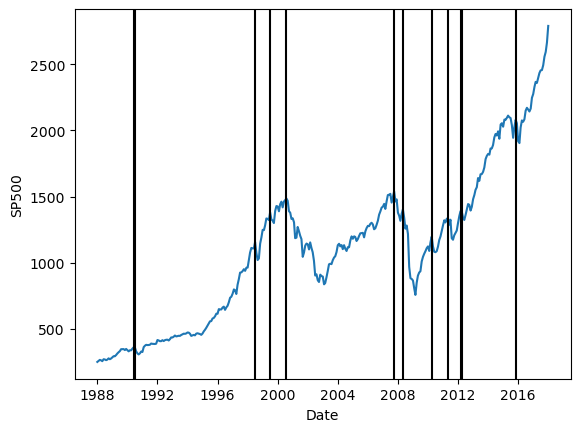

In [423]:
analysis_start_date = '1988-01-01'
analysis_end_date = '2018-01-01'
df_analysis = df[((df.Date<=analysis_end_date) & (df.Date>=analysis_start_date))].reset_index(drop = True)

ath_days = ath_days_f(df_analysis,4,0.975)

sns.lineplot(data = df_analysis, x = 'Date', y = 'SP500')
for h in ath_days:
    plt.axvline(h,color = 'black')
plt.show()

In [424]:
ath_gain = ath_return(df_analysis = df_analysis,ath_days = ath_days,n_years = 5)
any_day_gain = []
for s in range(100):
    any_day_gain.append(any_day_return(df_analysis,n_years = 5,seed = s))

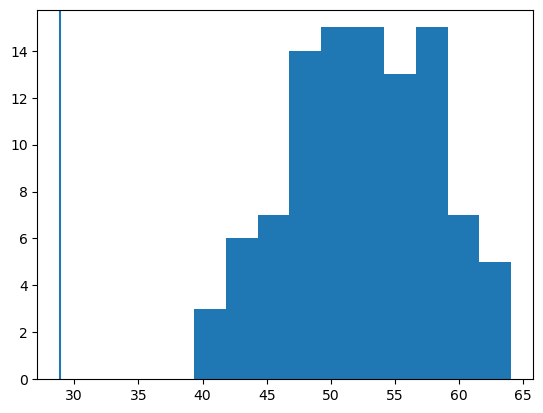

In [425]:
plt.hist(any_day_gain)
plt.axvline(ath_gain)
plt.show()

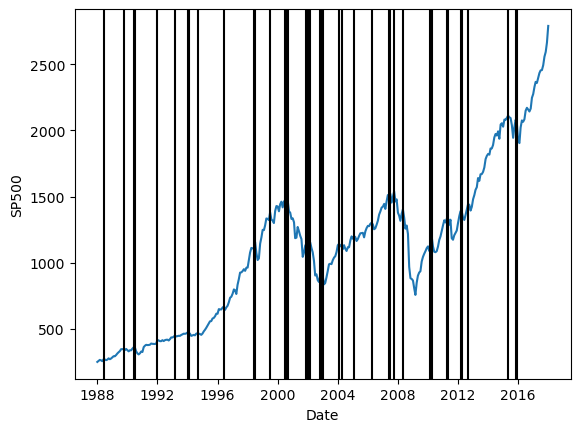

In [426]:
analysis_start_date = '1988-01-01'
analysis_end_date = '2018-01-01'
df_analysis = df[((df.Date<=analysis_end_date) & (df.Date>=analysis_start_date))].reset_index(drop = True)

ath_days = ath_days_f(df_analysis,4,0.99)

sns.lineplot(data = df_analysis, x = 'Date', y = 'SP500')
for h in ath_days:
    plt.axvline(h,color = 'black')
plt.show()

In [427]:
ath_gain = ath_return(df_analysis = df_analysis,ath_days = ath_days,n_years = 5)
any_day_gain = []
for s in range(100):
    any_day_gain.append(any_day_return(df_analysis,n_years = 5,seed = s))

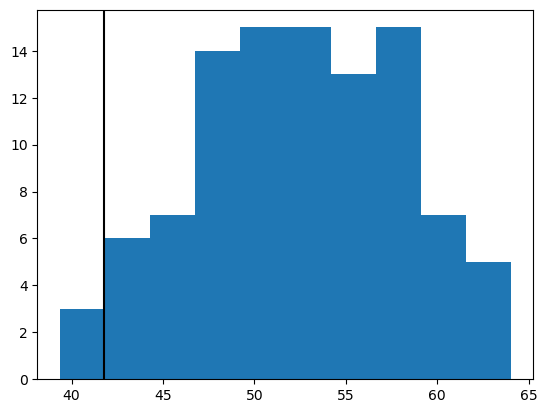

In [428]:
plt.hist(any_day_gain)
plt.axvline(ath_gain,color = 'black')
plt.show()